# L2 Reading要求：
* DLwP: C3（已完成）
* <font color='red'>未完成</font> DL: 4.1,4.2,4.3,5.1,5.2



# DLwP: C3

###对不同类数据处理采取不同的layer、不同数据类型:
* **Simple vector data**, stored in 2D tensors of shape (samples, features): densely connected layers
*  **Sequence data**, stored in 3D tensors of shape (samples, timesteps, features): recurrent layers, such as an LSTM layer. 
*  **Image data**, stored in 4D tensors: 2D convolution layers (Conv2D).

### 对不同类型问题采取不同loss function:
* **Two-class classification**: binary crossentropy.
* **Many-class classification**: categorical crossentropy.
* **Regression**: mean-squared error.
* **Sequence-learning**: connectionist temporal classification (CTC) 
* 也有可能问题需要自定义loss function

In [0]:
# could directly specify learning rate in optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

## 3.4. Classifying movie reviews (binary, IMDB)

In [0]:
import numpy as np

In [0]:
from keras.datasets import imdb
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=10000)
#The argument num_words=10000 means you’ll only keep the top 10,000 most fre- quently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
train_x[1], train_y[1]
np.shape(train_x), np.shape(train_y), np.shape(train_x[0])

((25000,), (25000,), (218,))

train_x是25000条review，每条包括单词对应的index。因为只保留了10000高频词，所以index最大是9999. train_y是25000个数字，只有0/1. 1是positive而0是negative.

可以通过word_index = imdb.get_word_index()得到单词和index 的对应dictionary [(value, key) for (key, value) in word_index.items()]).

In [0]:
#Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_x)
x_test = vectorize_sequences(test_x)

#vectorize labels
y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

Set neural network as:
* Two intermediate layers with 16 hidden units each
* A third layer that will output the scalar prediction regarding the sentiment of the current review

中间层的activation用relu (rectified linear unit): y=max(x, 0)





In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


#### Activation function:
加上nonlinearity. 若没有非线性，无论多少层线性变换都不会拓展hypothesis space.
最普遍用的是relu.

<h4 style='padding: 10px'>Softmax与Sigmoid差别</h2><table class='table table-striped'> <thead> <tr> <th> </th> <th>Softmax</th> <th>Sigmoid</th>  </tr> </thead> <tbody> <tr> <th scope='row'>1</th> <td>Many-class classification</td> <td>Binary classification</td> </tr> <tr> <th scope='row'>2</th> <td>Probabilities sum =1</td> <td>Probabilities sum need not be 1</td> </tr> <tr> <th scope='row'>3</th> <td>Used in different layers</td> <td>activation function</td> </tr> <th scope='row'>4</th> <td>High value will have the higher probability than other values</td> <td>The high value will have the high probability but not the higher probability.</td> </tbody> </table>


---



---



#### Loss function:
这里是binary classification，所以用binary_crossentropy loss. 

其实也可以用别的，比如mean squared error. 但是如果输出是probabilities, 最好用crossentropy, measure the difference between probability distribution/ground-truth distribution and predictions.







In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
# Or for customize parameters:
# model.compile(optimizer = optimizers.RMSprop(lr=0.001),
#               loss = losses.binary_crossentropy,
#               metrics = ['accuracy']
#              )

In [0]:
# Add validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [0]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 10,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 5s 312us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/10
15000/15000 [==============================] - 2s 103us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/10
15000/15000 [==============================] - 2s 105us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/10
15000/15000 [==============================] - 2s 106us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/10
15000/15000 [==============================] - 2s 106us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/10
15000/15000 [==============================] - 2s 106us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Epoch 7/10
15000/15000 [==============================] - 2s 106us/step - 

In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
history.history['acc']

[0.7813333335240682,
 0.9047333333651225,
 0.9284666666030884,
 0.9437333335558573,
 0.9542666663805643,
 0.9650000000635783,
 0.9704666668256123,
 0.9763333331108093,
 0.9821333333015442,
 0.9852666666348775]

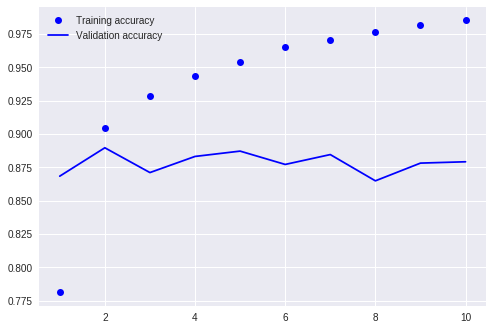

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epoches = range(1,11)
plt.plot(epoches, acc, 'bo', label='Training accuracy')
plt.plot(epoches, val_acc, 'b', label='Validation accuracy')
plt.legend()
plt.show()

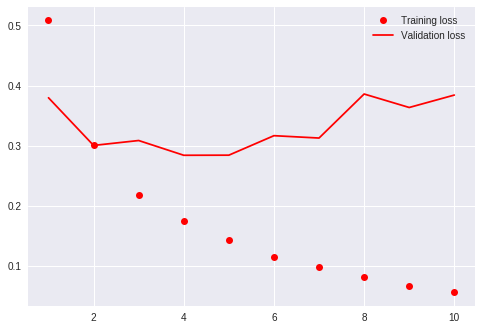

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epoches = range(1,11)
plt.plot(epoches, loss, 'ro', label='Training loss')
plt.plot(epoches, val_loss, 'r', label='Validation loss')
plt.legend()
plt.show()

根据gradient descent oprimization, training loss随epoch增加下降。但是validation loss并不是这样。从第二个epoch开始overfit.

所以这里重新train model并把epoches选为4

In [0]:
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.1800 - acc: 0.9442
Epoch 2/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.1326 - acc: 0.9575
Epoch 3/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.1114 - acc: 0.9638
Epoch 4/4
25000/25000 [==============================] - 3s 104us/step


In [0]:
results

[0.42327681395530703, 0.8634]

In [0]:
model.predict(x_test)

array([[0.04402047],
       [0.99997705],
       [0.90803456],
       ...,
       [0.24396256],
       [0.04935697],
       [0.91367227]], dtype=float32)

**Wrapping up**
* You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options, too.
* Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a Dense layer with one unit and a sigmoid activation: the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy.
* The rmsprop optimizer is generally a good enough choice, whatever your prob- lem. That’s one less thing for you to worry about.
* As they get better on their training data, neural networks eventually start over- fitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.

## 3.5. Classifying newswires (multiclass classification)

In [0]:
# load data
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [0]:
len(train_data),train_data[10]

(8982,
 [1,
  245,
  273,
  207,
  156,
  53,
  74,
  160,
  26,
  14,
  46,
  296,
  26,
  39,
  74,
  2979,
  3554,
  14,
  46,
  4689,
  4329,
  86,
  61,
  3499,
  4795,
  14,
  61,
  451,
  4329,
  17,
  12])

In [0]:
# vectorize data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

对于label, 这里采取one-hot encoding,又称为categorical encoding. 就是label只有对应的取1，其它取0.

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

也可以build in way, to_categorical()

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


与上一个binary classification例子相比，显然这里要做改动：
* 中间层的units数量要增加。之前是16，但这里输出就要46，中间层要比输出多，取64.
* 最后层输出是multi class, 46而非1.
* 最后层的activation改成softmax.
* loss function也要改成categorical_crossentropy. 衡量distance between probability distribution predicted and that of true labels.

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 124us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/10
7982/7982 [==============================] - 1s 82us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/10
7982/7982 [==============================] - 1s 80us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/10
7982/7982 [==============================] - 1s 79us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/10
7982/7982 [==============================] - 1s 77us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/10
7982/7982 [==============================] - 1s 82us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/10
7982/7982 [==============================] - 1s 76us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

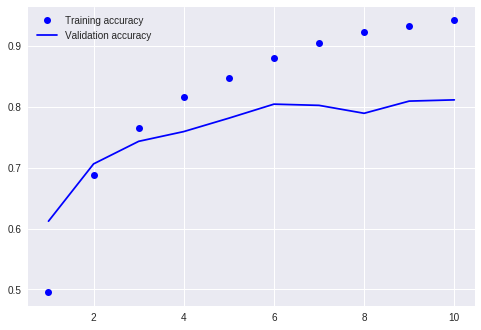

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epoch = range(1,11)
plt.plot(epoch, acc, 'bo', label='Training accuracy')
plt.plot(epoch, val_acc, 'b', label='Validation accuracy')
plt.legend()
plt.show()

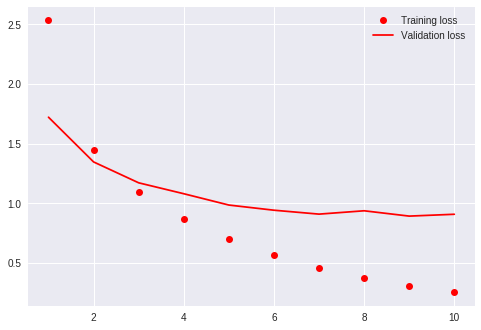

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1,11)
plt.plot(epoch, loss, 'ro', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.legend()
plt.show()

说从9个epoch之后overfit，所以重新train model with 9 epochs.

In [0]:
model.fit(x_train,
         one_hot_train_labels,
         epochs=9,
         batch_size=512)
results=model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
8982/8982 [==============================] - 1s 74us/step - loss: 0.2944 - acc: 0.9338
Epoch 2/9
8982/8982 [==============================] - 1s 85us/step - loss: 0.2346 - acc: 0.9426
Epoch 3/9
8982/8982 [==============================] - 1s 83us/step - loss: 0.2030 - acc: 0.9470
Epoch 4/9
8982/8982 [==============================] - 1s 76us/step - loss: 0.1789 - acc: 0.9505
Epoch 5/9
8982/8982 [==============================] - 1s 77us/step - loss: 0.1623 - acc: 0.9522
Epoch 6/9
8982/8982 [==============================] - 1s 76us/step - loss: 0.1487 - acc: 0.9535
Epoch 7/9
8982/8982 [==============================] - 1s 71us/step - loss: 0.1394 - acc: 0.9528
Epoch 8/9
8982/8982 [==============================] - 1s 80us/step - loss: 0.1320 - acc: 0.9542
Epoch 9/9
2246/2246 [==============================] - 0s 106us/step


In [0]:
results

[1.1195371560719218, 0.7916295637218207]

With integer labels, you should use **sparse_categorical_ crossentropy**.


Wrapping up
* If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.
* In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes.
* Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
* There are two ways to handle labels in multiclass classification:
 *  Encoding the labels via categorical encoding (also known as one-hot encod-
ing) and using categorical_crossentropy as a loss function
 * Encoding the labels as integers and using the sparse_categorical_crossentropy
loss function
* If you need to classify data into a large number of categories, you should avoid
creating information bottlenecks in your network due to intermediate layers that are too small.

## 3.6 Predicting house prices (regression)

404 training samples and 102 test samples, each with 13 numerical features, such as per capita crime rate, average number of rooms per dwelling, accessibility to highways, and so on.

The targets are the median values of owner-occupied homes, in thousands of dollars.


In [2]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 1us/step


In [0]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

13个feature, 不同feature的scale不同。需要normalizing.

需要注意的是，test data用train的mean, std去scale。在计算过程中，不可以碰任何test data，即使是data normalization.

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

**Network model for regression需要注意：**
* 因为是regression，最后一层不要activation，对于标量输出是single unit。这样才能保证出来的是任意range的continuous value. 
* Loss function 用MSE。
* Metric用MAE (mean absolute error), 是absolute value of the difference between the predictions and the targets.

In [0]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

数据量小，所以用k-fold validation. 也因此上面把model写成函数，因为要call 多次。

In [5]:
import numpy as np

k = 4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #',i)
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                      train_data[(i+1)*num_val_samples:]],
                                     axis=0)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                      train_targets[(i+1)*num_val_samples:]],
                                     axis=0)
  
  model = build_model()
  model.fit(partial_train_data,
           partial_train_targets,
           epochs=num_epochs,
           batch_size=1,
           verbose=0)# train the model in silent mode, verbose=0，不输出进度条、每个epoch等
  val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)

processing fold # 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
processing fold # 1
processing fold # 2
processing fold # 3


In [6]:
all_scores

[2.0581326413862775, 2.2001309324019025, 2.8750618802438868, 2.410775157484678]

这样k-fold, 得到大致的mae分布，比单一数值可信。
因为数据量小，会担心不能很好的反映整体的variability.



---

然后取了500 epochs, 再做k fold. 做validation MAE（k fold取平均）对于epochs的分布，找到合适的epochs数量重新建立模型并且test.

**这里略去实现过程，书上有**

**Wrapping up**
* Regression is done using different loss functions than what we used for classifi- cation. Mean squared error (MSE) is a loss function commonly used for regression.
* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).
* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
* When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
* When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.

### Chapter summary
* You’re now able to handle the most common kinds of machine-learning tasks on vector data: binary classification, multiclass classification, and sca- lar regression. The “Wrapping up” sections earlier in the chapter summarize the important points you’ve learned regarding these types of tasks.
* You’ll usually need to preprocess raw data before feeding it into a neural network.
* When your data has features with different ranges, scale each feature independently as part of preprocessing.
* As training progresses, neural networks eventually begin to overfit and obtain worse results on never-before-seen data.
* If you don’t have much training data, use a small network with only one or two hidden layers, to avoid severe overfitting.
* If your data is divided into many categories, you may cause information bottlenecks if you make the intermediate layers too small.
* Regression uses different loss functions and different evaluation metrics than classification.
* When you’re working with little data, K-fold validation can help reliably evaluate your model.